# BIC TCP Simulation Analyzes

Two simulations were done. 
- in the first simulation everything was normal.
- in the second simulation there was more packet loss.

Threading was used to simulate packet loss which waits for random number and then it enters fast recovery mode.


### importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Reading Data

In [2]:
df11 = pd.read_csv('bic_tcp_parameters1.csv')

df12 = pd.read_csv('log1.log', delimiter='--', engine='python', names=['round', 'message'])
df12['round'] = df12['round'].astype(int)
df12['message'] = df12['message'].astype(str).apply(str.strip)

In [3]:
df11.head()

,round,cwnd,wmax,wmin
0,1.0,10.500000,30.000000,5.0
1,2.0,9.604167,10.290179,5.0
2,3.0,9.708288,10.290179,5.0
3,4.0,9.811293,10.290179,5.0
4,5.0,9.913216,10.290179,5.0


In [4]:
df12.head()

,round,message
0,1,cwnd(10) < wmax(30)
1,1,bic increase(10.0) > Smax(5)
2,1,cwnd = 10.5
3,2,cwnd(10.5) < wmax(30)
4,2,bic increase(9.75) > Smax(5)


In [5]:
df21 = pd.read_csv('bic_tcp_parameters2.csv')

df22 = pd.read_csv('log2.log', delimiter='--', engine='python', names=['round', 'message'])
df22['round'] = df22['round'].astype(int)
df22['message'] = df22['message'].astype(str).apply(str.strip)

In [6]:
df21.head()

,round,cwnd,wmax,wmin
0,1.0,10.500000,30.0,5.0
1,2.0,10.976190,30.0,5.0
2,3.0,11.431722,30.0,5.0
3,4.0,11.869101,30.0,5.0
4,5.0,12.290363,30.0,5.0


In [7]:
df22.head()

,round,message
0,1,cwnd(10) < wmax(30)
1,1,bic increase(10.0) > Smax(5)
2,1,cwnd = 10.5
3,2,cwnd(10.5) < wmax(30)
4,2,bic increase(9.75) > Smax(5)


#### NOTE:
- df11 and df21 both contain tcp values at the end of each round(RTT).
- df12 and df22 both contain BIC TCP logs in 1000 round(RTT).
- the second simulation (df21, df22) had more packet loss.

### Get Certain Rounds Info
simply just change the numbers and see the results.

#### - Bic TCP parameters data at the end of round n

In [8]:
n = 1

In [9]:
df11.loc[df11['round']== n]

,round,cwnd,wmax,wmin
0,1.0,10.5,30.0,5.0


In [10]:
df21.loc[df21['round']== n]

,round,cwnd,wmax,wmin
0,1.0,10.5,30.0,5.0


#### - Bic TCP logs at round n

In [11]:
df12.loc[df12['round']== n]

,round,message
0,1,cwnd(10) < wmax(30)
1,1,bic increase(10.0) > Smax(5)
2,1,cwnd = 10.5


In [12]:
df22.loc[df22['round']== n]

,round,message
0,1,cwnd(10) < wmax(30)
1,1,bic increase(10.0) > Smax(5)
2,1,cwnd = 10.5


### Descriptive Statistics of the first dataframe.
without considering round column

In [13]:
df11.iloc[:, 1:].describe()

,cwnd,wmax,wmin
count,1000.000000,1000.000000,1000.0
mean,31.433616,30.656178,5.0
std,5.772626,8.962233,0.0
min,9.604167,10.290179,5.0
25%,28.616758,28.773247,5.0
50%,33.339604,35.025955,5.0
75%,35.282111,36.152939,5.0
max,39.828927,39.923420,5.0


In [14]:
df21.iloc[:, 1:].describe()

,cwnd,wmax,wmin
count,1000.000000,1000.000000,1000.0
mean,17.306670,17.855934,5.0
std,2.058791,2.636943,0.0
min,10.500000,13.647358,5.0
25%,15.861527,16.066191,5.0
50%,16.870774,17.424717,5.0
75%,18.726866,19.334626,5.0
max,22.413043,30.000000,5.0


### Get rounds where packet loss occured.

In [15]:
def get_packet_loss_rounds(df):
    """
    it filters the given dataframe and make a list of the round numbers
    and prints the len of list and the list.
    """
    filtered_df = df.loc[df['message'] == 'PACKET LOSS']
    rounds = filtered_df['round'].tolist()
    print(len(rounds))
    print(*rounds, sep=' ,')

In [16]:
get_packet_loss_rounds(df12)

11
2 ,147 ,359 ,407 ,525 ,675 ,732 ,733 ,790 ,935 ,1001


In [17]:
get_packet_loss_rounds(df22)

29
11 ,65 ,147 ,217 ,260 ,299 ,340 ,356 ,386 ,393 ,442 ,460 ,502 ,535 ,568 ,605 ,644 ,657 ,703 ,730 ,759 ,801 ,812 ,870 ,879 ,934 ,965 ,979 ,1001


### Plotting BIC TCP parameters over time.

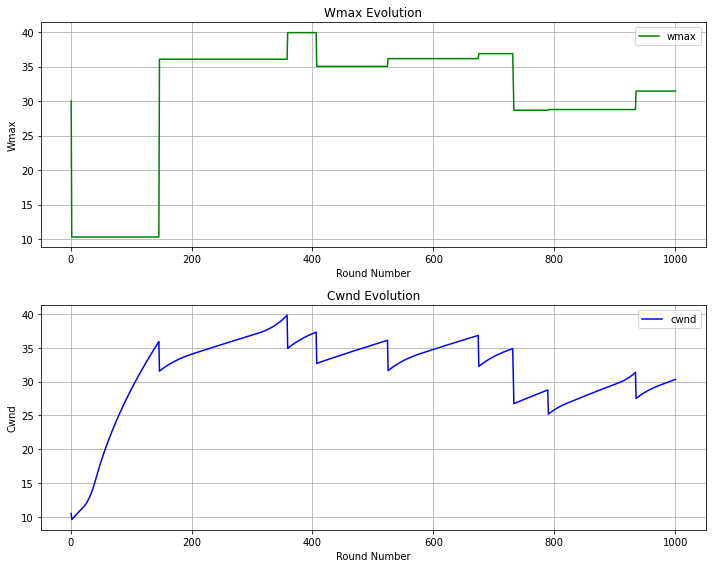

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot wmax against roundnumber
axs[0].plot(df11['round'], df11['wmax'], label='wmax', color='green')
axs[0].set_xlabel('Round Number')
axs[0].set_ylabel('Wmax')
axs[0].set_title('Wmax Evolution')
axs[0].grid(True)
axs[0].legend()

# Plot cwnd against roundnumber
axs[1].plot(df11['round'], df11['cwnd'], label='cwnd', color='blue')
axs[1].set_xlabel('Round Number')
axs[1].set_ylabel('Cwnd')
axs[1].set_title('Cwnd Evolution')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()

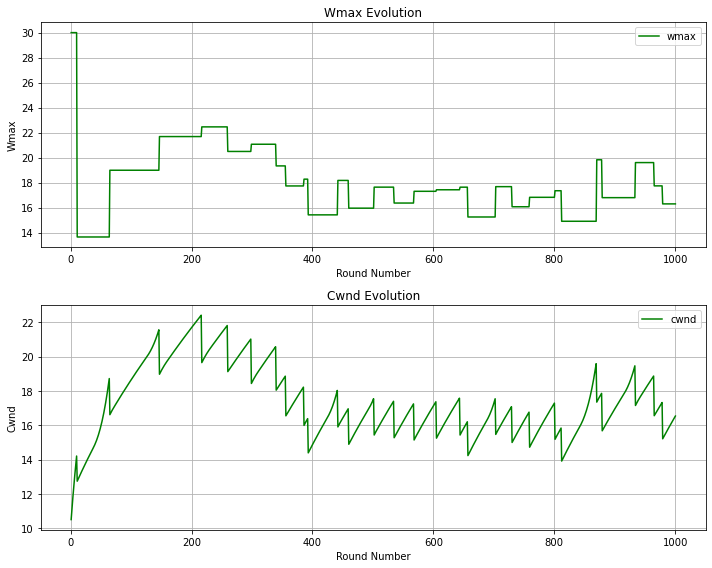

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot wmax against roundnumber
axs[0].plot(df21['round'], df21['wmax'], label='wmax', color='green')
axs[0].set_xlabel('Round Number')
axs[0].set_ylabel('Wmax')
axs[0].set_title('Wmax Evolution')
axs[0].grid(True)
axs[0].legend()

# Plot cwnd against roundnumber
axs[1].plot(df21['round'], df21['cwnd'], label='cwnd', color='green')
axs[1].set_xlabel('Round Number')
axs[1].set_ylabel('Cwnd')
axs[1].set_title('Cwnd Evolution')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()